In [1]:
!pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.17.3 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.17.3 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.17.3 which is incompatible.


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached protobuf-4.22.4-cp39-cp39-win_amd64.whl (420 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()

print("x_train : ", np.shape(x_train))
print("t_train : ", np.shape(t_train))
print("x_test : ", np.shape(x_test))
print("t_test : ", np.shape(t_test))

x_train :  (50000, 32, 32, 3)
t_train :  (50000, 1)
x_test :  (10000, 32, 32, 3)
t_test :  (10000, 1)


In [3]:
print("x_train 1번째 이미지 shape : ", x_train[0].shape)
x_train[0]

x_train 1번째 이미지 shape :  (32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

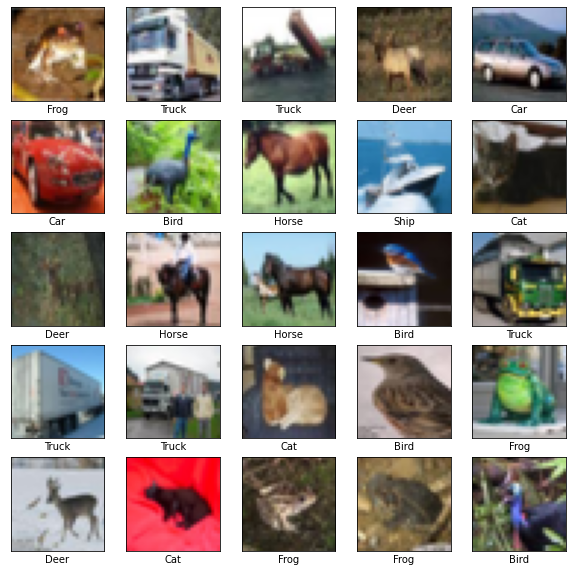

In [4]:
label_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(label_names[t_train[i][0]])
    
plt.show()

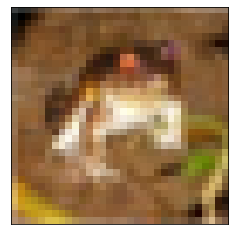

In [5]:
image_0 = x_train[0]

plt.xticks([])
plt.yticks([])
plt.imshow(image_0, cmap='gray')

plt.show()

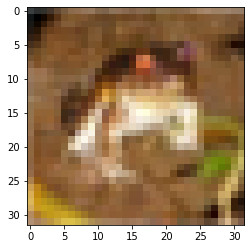

In [6]:
plt.imshow(x_train[0])
plt.show()

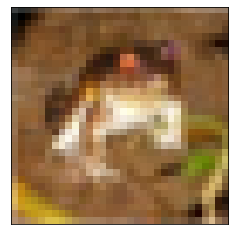

In [7]:
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[0])
plt.show()

In [8]:
t_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
for i in range(5):
    print(t_train[i])

[6]
[9]
[9]
[4]
[1]


In [10]:
for i in range(5):
    print(t_train[i][0])

6
9
9
4
1


In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

print("One-hoe Vector 적용 후 t_train shape : ", t_train.shape)
print("One-hoe Vector 적용 후 t_test shape : ", t_test.shape)

One-hoe Vector 적용 후 t_train shape :  (50000, 10)
One-hoe Vector 적용 후 t_test shape :  (10000, 10)


In [12]:
width = 32
height = 32
channel = 3

model = Sequential(name = 'CIRAR10_CNN')

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same', activation='relu', input_shape = (width, height, channel)))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()


Model: "CIRAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        

In [13]:
model.fit(x_train, t_train, epochs = 10, batch_size = 16)

Epoch 1/10
3125/3125 [==============================] - 79s 25ms/step - loss: 1.3164 - accuracy: 0.5296
Epoch 2/10
3125/3125 [==============================] - 83s 27ms/step - loss: 0.9167 - accuracy: 0.6825
Epoch 3/10
3125/3125 [==============================] - 87s 28ms/step - loss: 0.7755 - accuracy: 0.7301
Epoch 4/10
3125/3125 [==============================] - 88s 28ms/step - loss: 0.6796 - accuracy: 0.7649
Epoch 5/10
3125/3125 [==============================] - 88s 28ms/step - loss: 0.6057 - accuracy: 0.7902
Epoch 6/10
3125/3125 [==============================] - 99s 32ms/step - loss: 0.5399 - accuracy: 0.8116
Epoch 7/10
3125/3125 [==============================] - 94s 30ms/step - loss: 0.4868 - accuracy: 0.8304
Epoch 8/10
3125/3125 [==============================] - 87s 28ms/step - loss: 0.4357 - accuracy: 0.8466
Epoch 9/10
3125/3125 [==============================] - 88s 28ms/step - loss: 0.3923 - accuracy: 0.8597
Epoch 10/10
3125/3125 [==============================] - 89s 29m

1/1 [==============================] - 0s 107ms/step
예측 : Cat/ 정답 : Cat


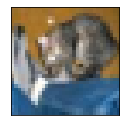

1/1 [==============================] - 0s 20ms/step
예측 : Ship/ 정답 : Ship


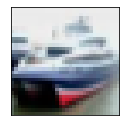

1/1 [==============================] - 0s 20ms/step
예측 : Airplane/ 정답 : Ship


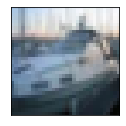

1/1 [==============================] - 0s 20ms/step
예측 : Airplane/ 정답 : Airplane


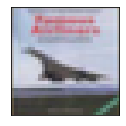

1/1 [==============================] - 0s 21ms/step
예측 : Frog/ 정답 : Frog


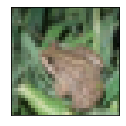

1/1 [==============================] - 0s 23ms/step
예측 : Frog/ 정답 : Frog


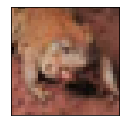

1/1 [==============================] - 0s 23ms/step
예측 : Truck/ 정답 : Car


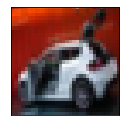

1/1 [==============================] - 0s 21ms/step
예측 : Deer/ 정답 : Frog


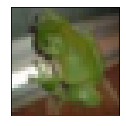

1/1 [==============================] - 0s 21ms/step
예측 : Deer/ 정답 : Cat


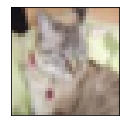

1/1 [==============================] - 0s 26ms/step
예측 : Car/ 정답 : Car


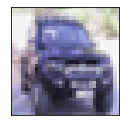

In [14]:
width = 32
height = 32
channel = 3

label_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(10):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(width, height, channel))
    
    print("예측 : " + label_names[np.argmax(output)] + '/ 정답 : ' + label_names[np.argmax(t_test[i])])
    plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, t_test, verbose = 1)

print("test loss : ", round(loss, 6))
print("test accuracy : ", round(accuracy * 100, 3), "%")

313/313 [==============================] - 5s 16ms/step - loss: 0.9519 - accuracy: 0.7335
test loss :  0.951904
test accuracy :  73.35 %
